In [3]:
# Importing neccessary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it

In [4]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:

data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#convert into Numerical feature 
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [7]:
# numerical feature
numerical_feature = {feature for feature in data.columns if data[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 4
Numerical feature are:
 {'TotalCharges', 'SeniorCitizen', 'tenure', 'MonthlyCharges'}


In [8]:
# Categorical feature
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 17
Categorical feature are:
 {'PaymentMethod', 'OnlineBackup', 'InternetService', 'Dependents', 'gender', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn', 'StreamingTV', 'Partner', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'customerID'}


## EDA

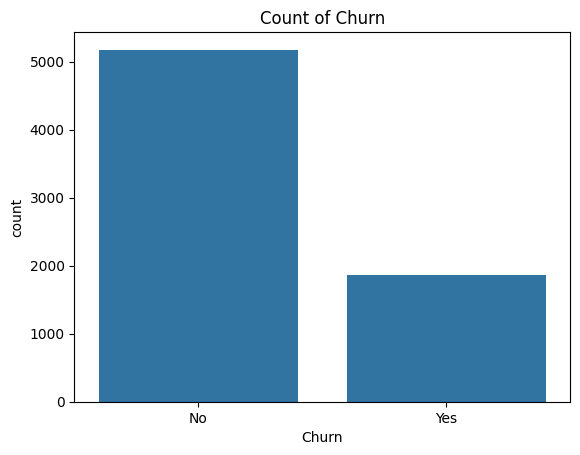

In [9]:
# plotting with target feature
sns.countplot(data=data, x='Churn')
plt.title('Count of Churn')
plt.show()

In [10]:
l1 = data.loc[data['Churn']== 'Yes'].count()[0]
print(f"Pecentage of Left: {l1/len(data['Churn'])}")
print(data.Churn.value_counts())

Pecentage of Left: 0.2653698707936959
Churn
No     5174
Yes    1869
Name: count, dtype: int64


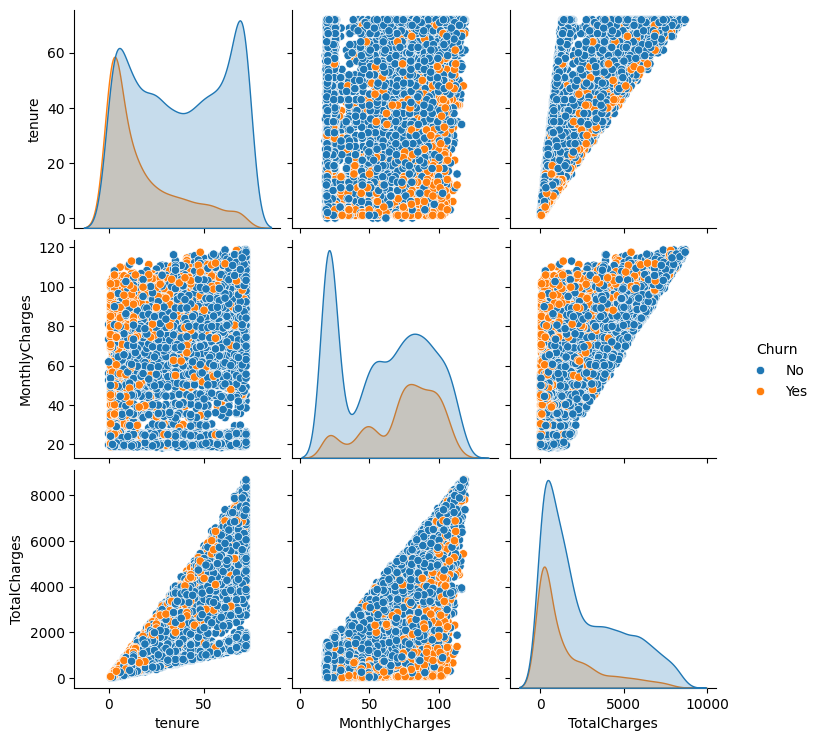

In [11]:
sns.pairplot(data.drop(columns='SeniorCitizen'),hue='Churn', kind='scatter')
plt.show()

#### **Data Cleaning:**

In [12]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
# replace NaN values with mean value
data.TotalCharges = data.TotalCharges.fillna(data.TotalCharges.median())

<Axes: >

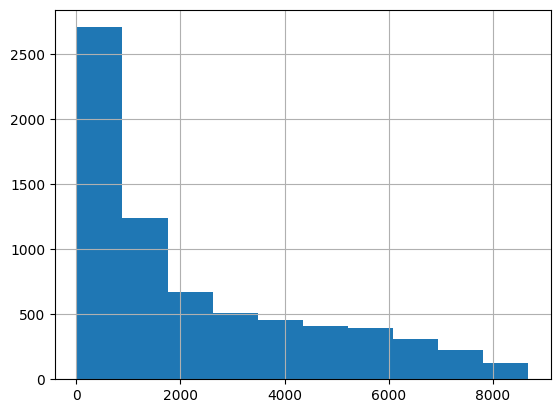

In [15]:
data.TotalCharges.hist()

In [16]:
print(categorical_feature)

{'PaymentMethod', 'OnlineBackup', 'InternetService', 'Dependents', 'gender', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn', 'StreamingTV', 'Partner', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'customerID'}


In [17]:

encoder = LabelEncoder()
for feature in categorical_feature:
    data[feature] = encoder.fit_transform(data[feature])

In [18]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [19]:
data.drop(columns=['customerID'], inplace=True)

#### Splitting the dataset into train and test

In [20]:
# splitting dataset into dependent and independent feature
X = data.drop(columns='Churn')
y = data['Churn']

In [21]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [22]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape

(5634, 19)

In [24]:
X_test.shape

(1409, 19)

In [25]:
# its an imbalance dataset
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

#### **Apply into machine learning algorithm:**

In [26]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Accuracy score : 0.7977288857345636
Confusion matrix :
 [[908 187]
 [ 98 216]]
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      1095
           1       0.54      0.69      0.60       314

    accuracy                           0.80      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.82      0.80      0.81      1409



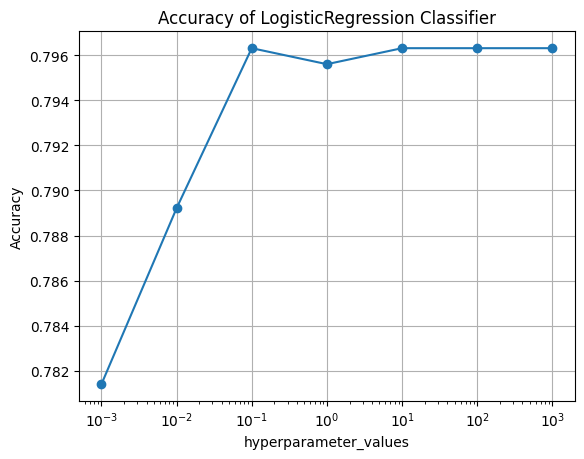

In [37]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_scores = []
for c in C_values:
    Log_reg = LogisticRegression(C=c, max_iter=150)
    Log_reg.fit(X_train, y_train)
    log_pred = Log_reg.predict(X_test)
    accuracy_scores.append(accuracy_score(log_pred, y_test))
plt.plot(C_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. hyperparameter_values')
plt.title('Accuracy of LogisticRegression Classifier')
plt.xlabel('hyperparameter_values')
plt.ylabel('Accuracy')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.grid(True)
plt.show()


In [39]:
# Random forest classifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

Accuracy score : 0.7955997161107168
Confusion matrix :
 [[928 210]
 [ 78 193]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      1138
           1       0.48      0.71      0.57       271

    accuracy                           0.80      1409
   macro avg       0.70      0.76      0.72      1409
weighted avg       0.84      0.80      0.81      1409



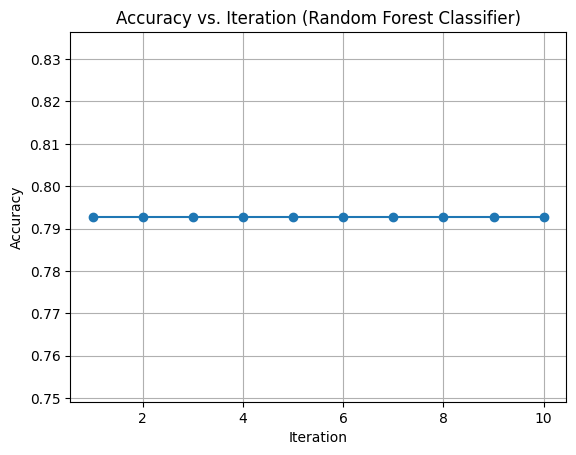

In [44]:
accuracy_scores_rfc = []
for _ in range(10):  # Repeat 10 times for smoothing
    rfc_pred = Rfc.predict(X_test)
    accuracy_scores_rfc.append(accuracy_score(y_test, rfc_pred))

# Plot accuracy scores
plt.plot(range(1, len(accuracy_scores_rfc) + 1), accuracy_scores_rfc, marker='o', linestyle='-')
plt.title('Accuracy vs. Iteration (Random Forest Classifier)')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [29]:
# decisionTree Classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

Accuracy score : 0.7927608232789212
Confusion matrix :
 [[916 202]
 [ 90 201]]
Classification report :
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      1118
           1       0.50      0.69      0.58       291

    accuracy                           0.79      1409
   macro avg       0.70      0.76      0.72      1409
weighted avg       0.83      0.79      0.80      1409



**As we compare to the imbalance dataset our model are perform like okay not a better model to build for end to end project. So we need to over smpling data for reducing the TN, FN and increase the FP and TP for model building**

In [30]:
##Resampling
from collections import Counter
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 4168, 1: 1466})
The number of classes after fit Counter({1: 2564, 0: 2165})


In [31]:
# splitting the over sampling dataset 
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [32]:
# decisionTree Classifier
Dtc_sampling = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=7, min_samples_leaf=15)
Dtc_sampling.fit(X_train_sap, y_train_sap)
dtc_sampling_pred = Dtc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(dtc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(dtc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9386892177589852
Confusion matrix :
 [[405  23]
 [ 35 483]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       428
           1       0.95      0.93      0.94       518

    accuracy                           0.94       946
   macro avg       0.94      0.94      0.94       946
weighted avg       0.94      0.94      0.94       946



In [33]:
# Random forest classifier
Rfc_sampling = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rfc_sampling.fit(X_train_sap, y_train_sap)
rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(rfc_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(rfc_sampling_pred, y_test_sap)}')

Accuracy score : 0.9386892177589852
Confusion matrix :
 [[403  21]
 [ 37 485]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       424
           1       0.96      0.93      0.94       522

    accuracy                           0.94       946
   macro avg       0.94      0.94      0.94       946
weighted avg       0.94      0.94      0.94       946



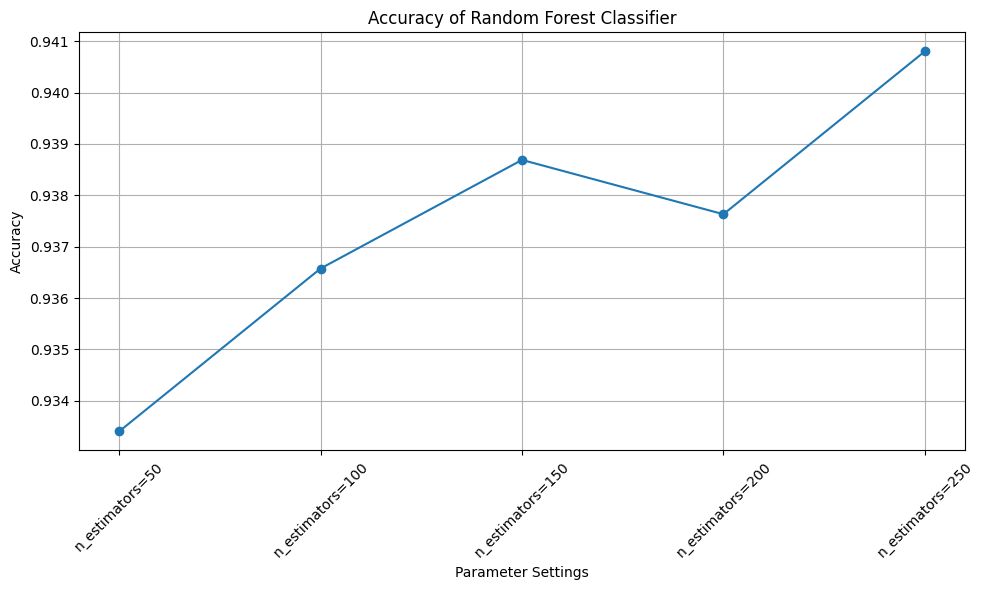

In [34]:
import matplotlib.pyplot as plt

# Define lists to store accuracy values and corresponding parameter settings
accuracy_values = []
parameter_settings = []

# Define different parameter settings you want to experiment with
# For example, different values of n_estimators, max_depth, etc.

# Let's say we vary the number of estimators
n_estimators_list = [50, 100, 150, 200, 250]

for n_estimators in n_estimators_list:
    # Create the random forest classifier with the current parameter setting
    Rfc_sampling = RandomForestClassifier(n_estimators=n_estimators, criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
    
    # Fit the classifier on training data
    Rfc_sampling.fit(X_train_sap, y_train_sap)
    
    # Predict on test data
    rfc_sampling_pred = Rfc_sampling.predict(X_test_sap)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(rfc_sampling_pred, y_test_sap)
    accuracy_values.append(accuracy)
    
    # Store the current parameter setting
    parameter_settings.append(f'n_estimators={n_estimators}')

# Plotting the accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(parameter_settings, accuracy_values, marker='o')
plt.title('Accuracy of Random Forest Classifier')
plt.xlabel('Parameter Settings')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
import pickle
filename = 'Model.sav'
pickle.dump(Rfc_sampling, open(filename,'wb'))
load_model = pickle.load(open(filename, 'rb'))
load_model.score(X_test_sap, y_test_sap)

0.9408033826638478

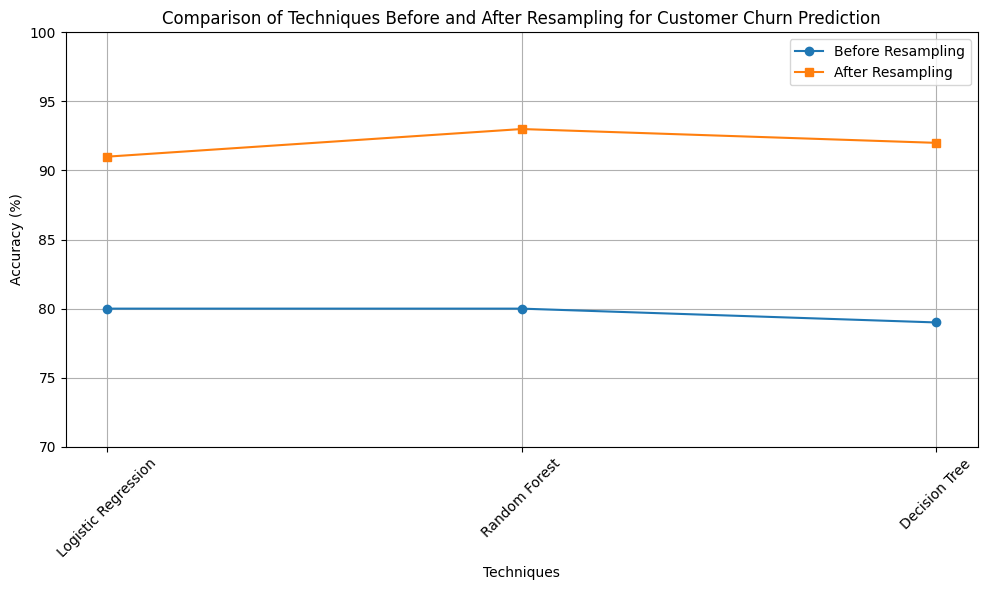

In [36]:
import matplotlib.pyplot as plt

# Techniques and their accuracy values before and after resampling
techniques = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracy_before_resampling = [80, 80, 79]
accuracy_after_resampling = [91, 93, 92]

# Plotting the comparison of accuracy before and after resampling
plt.figure(figsize=(10, 6))
plt.plot(techniques, accuracy_before_resampling, label='Before Resampling', marker='o')
plt.plot(techniques, accuracy_after_resampling, label='After Resampling', marker='s')

# Adding labels and title
plt.xlabel('Techniques')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Techniques Before and After Resampling for Customer Churn Prediction')
plt.ylim(70, 100)  # Adjust ylim for better visualization

# Adding legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()